In [1]:
import utils
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import config
import model

Num_sensor = 128
Num_gesture = 8
Num_labels = 8
subject = 1

hidden_units = [128, 128]
learning_rate = 0.002
dropout_rate = 0.15
num_epochs = 50
batch_size = 128

num_classes = 8

path = 'C:/Users/hml76/Desktop/Jupyter/Paper1__renew/CapgMyo/Data/DB_A_preproceesed/'
lr_scheduler = LearningRateScheduler(model.step_decay, verbose=1)

# Capgmyo A - KNN1 (subject 1)

Train data shape: (8116, 1001)
Test data shape: (2124, 1001)


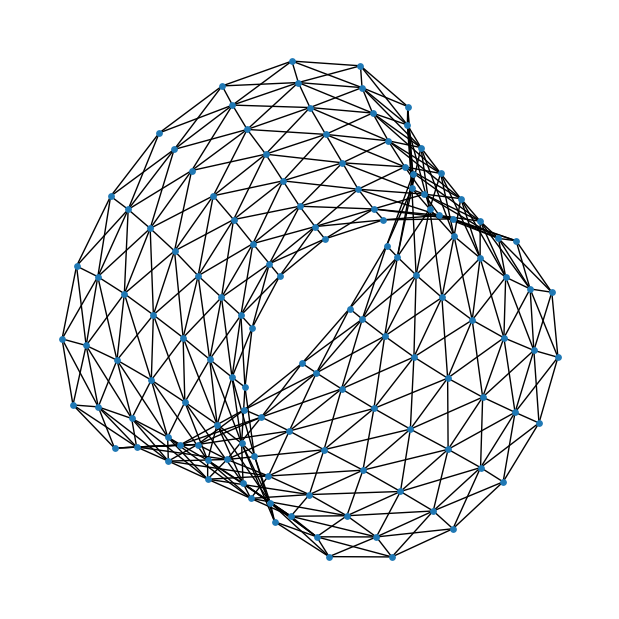

In [2]:
data_processor = utils.data_processing(Num_sensor, subject, Num_labels, Num_gesture)
EMG_dataframe = data_processor.build_data(path, D_Type='A')
Node_feature, X_train, y_train, X_test, y_test = data_processor.data_split(EMG_dataframe, ratio=0.2) #test ratio
graph_generator = config.Graph_CapgMyo(EMG_dataframe, Num_sensor)
graph, edges, edge_weights = graph_generator.KNN1()
graph_generator.draw_graph(graph[:900])

In [29]:
graph, edges, edge_weights = graph_generator.KNN1()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
64/64 [==============================] - 11s 79ms/step - loss: 2.0401 - acc: 0.2204 - val_loss: 2.0604 - val_acc: 0.1709
Epoch 2/50
64/64 [==============================] - 4s 68ms/step - loss: 1.5585 - acc: 0.4303 - val_loss: 2.0323 - val_acc: 0.3145
Epoch 3/50
64/64 [==============================] - 4s 66ms/step - loss: 0.9575 - acc: 0.6566 - val_loss: 2.8084 - val_acc: 0.2698
Epoch 4/50
64/64 [==============================] - 4s 65ms/step - loss: 0.5103 - acc: 0.8191 - val_loss: 2.3312 - val_acc: 0.3682
Epoch 5/50
64/64 [==============================] - 4s 64ms/step - loss: 0.2976 - acc: 0.9002 - val_loss: 3.3446 - val_acc: 0.3282
Epoch 6/50
64/64 [==============================] - 4s 60ms/step - loss: 0.1541 - acc: 0.9506 - val_loss: 4.1843 - val_acc: 0.3315
Epoch 7/50
64/64 [==============================] - 4s 67ms/step - loss: 0.1224 - acc: 0.9609 - val_loss: 0.7745 - val_acc: 0.7509
Epoch 8/50
64/64 [==============================] - 4s 60ms/step - loss: 0.0637 - 

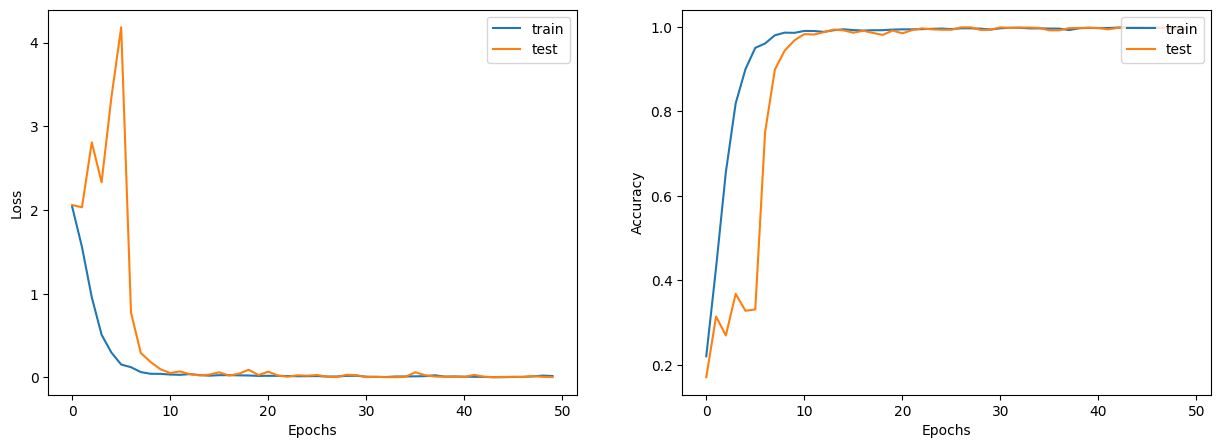

In [30]:
utils.display_learning_curves(history)

# Capgmyo A - KNN1+SW (subject 1)

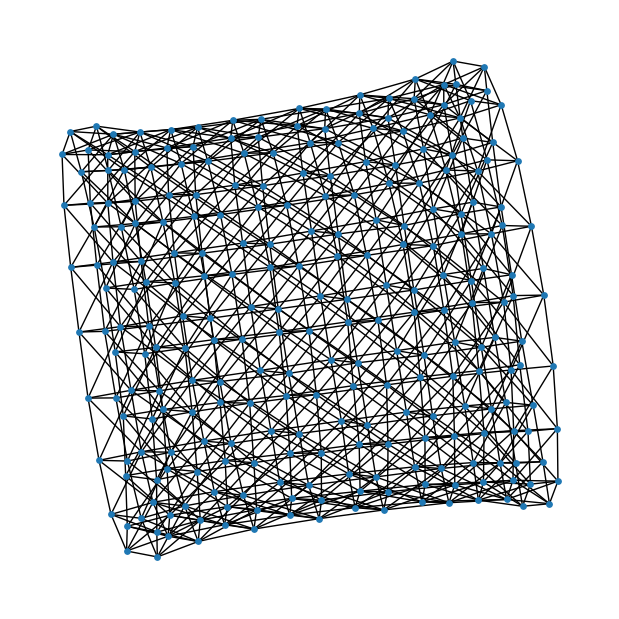

In [25]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_generator.draw_graph(graph[:1980])
#graph_generator.draw_graph(graph[:6200])

In [31]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
64/64 [==============================] - 11s 77ms/step - loss: 2.0274 - acc: 0.2209 - val_loss: 2.0569 - val_acc: 0.1483
Epoch 2/50
64/64 [==============================] - 4s 64ms/step - loss: 1.5448 - acc: 0.4362 - val_loss: 2.3069 - val_acc: 0.1685
Epoch 3/50
64/64 [==============================] - 4s 65ms/step - loss: 0.8992 - acc: 0.6676 - val_loss: 3.5485 - val_acc: 0.2976
Epoch 4/50
64/64 [==============================] - 4s 65ms/step - loss: 0.5345 - acc: 0.8064 - val_loss: 4.0709 - val_acc: 0.2815
Epoch 5/50
64/64 [==============================] - 4s 67ms/step - loss: 0.3013 - acc: 0.8926 - val_loss: 3.5354 - val_acc: 0.3606
Epoch 6/50
64/64 [==============================] - 4s 66ms/step - loss: 0.1716 - acc: 0.9384 - val_loss: 1.8683 - val_acc: 0.5118
Epoch 7/50
64/64 [==============================] - 4s 68ms/step - loss: 0.1065 - acc: 0.9648 - val_loss: 1.6551 - val_acc: 0.6384
Epoch 8/50
64/64 [==============================] - 4s 66ms/step - loss: 0.0698 - 

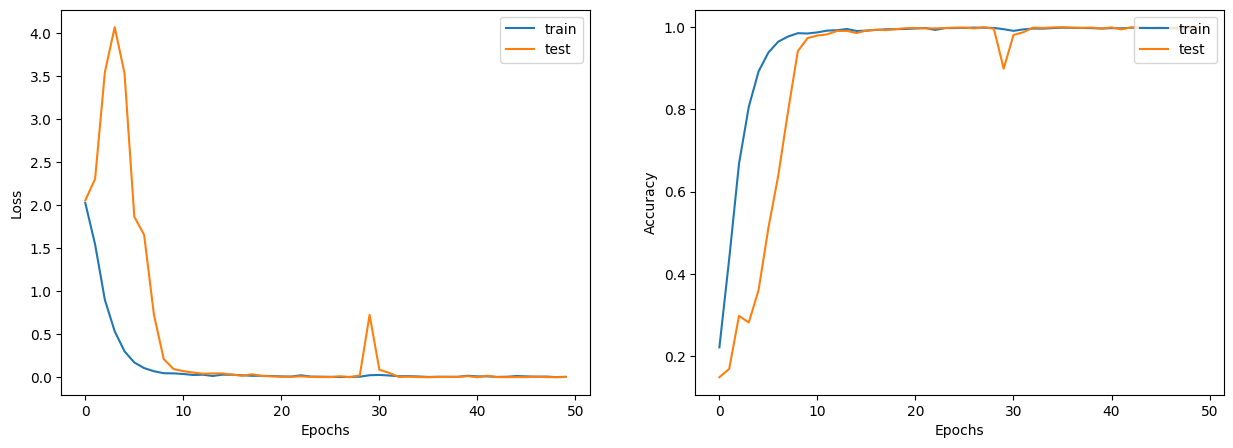

In [32]:
utils.display_learning_curves(history)

# Capgmyo A - KNN2 (subject 1)

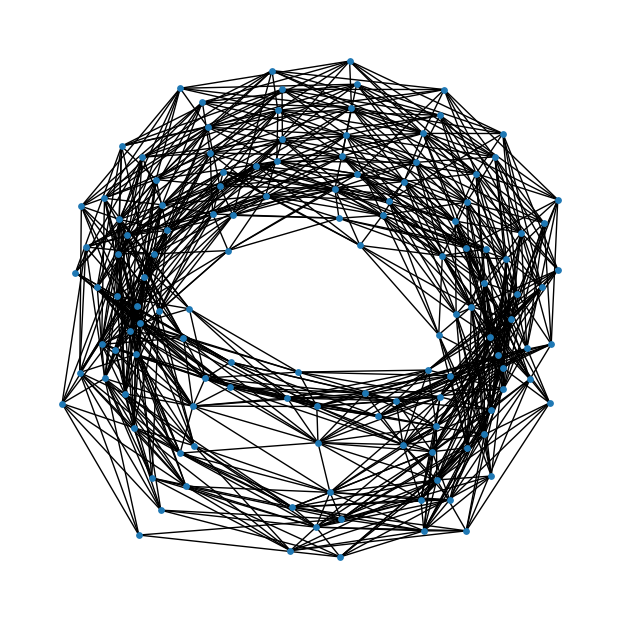

In [26]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_generator.draw_graph(graph[:1500])

In [33]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
64/64 [==============================] - 13s 96ms/step - loss: 2.0417 - acc: 0.2104 - val_loss: 2.0694 - val_acc: 0.1525
Epoch 2/50
64/64 [==============================] - 5s 83ms/step - loss: 1.4502 - acc: 0.4600 - val_loss: 2.5415 - val_acc: 0.2994
Epoch 3/50
64/64 [==============================] - 5s 86ms/step - loss: 0.8099 - acc: 0.6870 - val_loss: 3.2612 - val_acc: 0.2750
Epoch 4/50
64/64 [==============================] - 5s 84ms/step - loss: 0.4731 - acc: 0.8218 - val_loss: 3.6504 - val_acc: 0.3555
Epoch 5/50
64/64 [==============================] - 5s 81ms/step - loss: 0.2745 - acc: 0.9003 - val_loss: 3.2966 - val_acc: 0.3573
Epoch 6/50
64/64 [==============================] - 5s 84ms/step - loss: 0.1459 - acc: 0.9455 - val_loss: 2.5947 - val_acc: 0.4896
Epoch 7/50
64/64 [==============================] - 5s 83ms/step - loss: 0.0999 - acc: 0.9659 - val_loss: 1.0060 - val_acc: 0.7137
Epoch 8/50
64/64 [==============================] - 5s 85ms/step - loss: 0.0786 - 

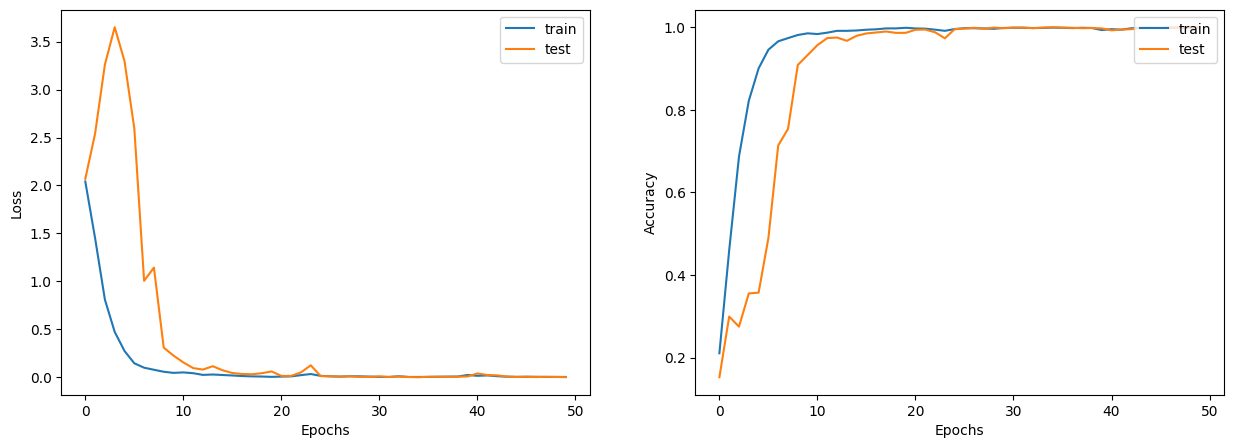

In [34]:
utils.display_learning_curves(history)

# Capgmyo A - KNN2+SW (subject 1)

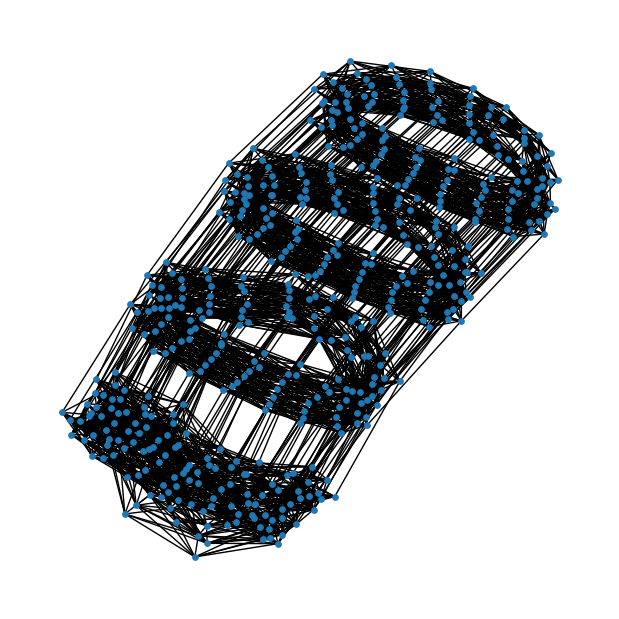

In [27]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_generator.draw_graph(graph[:6500])

In [35]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
64/64 [==============================] - 13s 103ms/step - loss: 2.0173 - acc: 0.2173 - val_loss: 2.0422 - val_acc: 0.1723
Epoch 2/50
64/64 [==============================] - 6s 89ms/step - loss: 1.4459 - acc: 0.4516 - val_loss: 2.8742 - val_acc: 0.2043
Epoch 3/50
64/64 [==============================] - 6s 89ms/step - loss: 0.7506 - acc: 0.7053 - val_loss: 3.4407 - val_acc: 0.2505
Epoch 4/50
64/64 [==============================] - 6s 88ms/step - loss: 0.3658 - acc: 0.8648 - val_loss: 2.6185 - val_acc: 0.3074
Epoch 5/50
64/64 [==============================] - 6s 88ms/step - loss: 0.1580 - acc: 0.9480 - val_loss: 5.2884 - val_acc: 0.2519
Epoch 6/50
64/64 [==============================] - 6s 88ms/step - loss: 0.0821 - acc: 0.9726 - val_loss: 2.3314 - val_acc: 0.4741
Epoch 7/50
64/64 [==============================] - 6s 90ms/step - loss: 0.0636 - acc: 0.9792 - val_loss: 2.0601 - val_acc: 0.5466
Epoch 8/50
64/64 [==============================] - 6s 88ms/step - loss: 0.0320 -

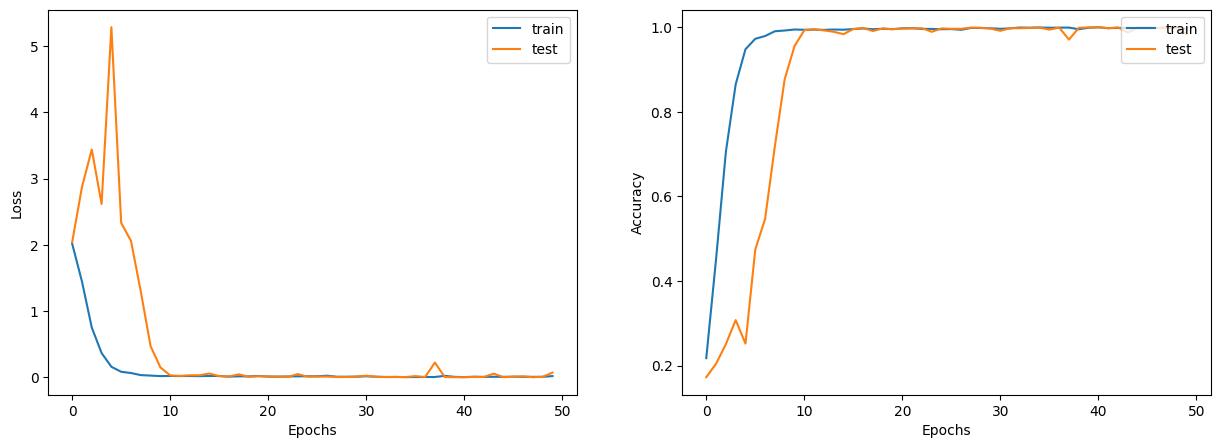

In [36]:
utils.display_learning_curves(history)